# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

(Please insert the background here )

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [50]:
import requests

url = 'https://www.coingecko.com/en/coins/ethereum/historical_data/?start_date=2020-01-01&end_date=2021-06-30'; 
url_get = requests.get(url, 
                      headers = {
        'User-Agent': 'Popular browser\'s user-agent',
    })

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [51]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<script src="/cdn-cgi/apps/head/gYtXOyllgyP3-Z2iKTP8rRWGBm4.js"></script><script async defer src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992"></script>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<script>window.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"cd4a6493ab","applicationID":"83495717","transactionName":"dV5dRBNcDlkEEU5SDF9fQB8JWhFBDhEIUgJabldR'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [52]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [53]:
table = soup.find('table',class_ = "table table-striped text-sm text-lg-normal")
table


<table class="table table-striped text-sm text-lg-normal">
<thead>
<tr>
<th class="text-center">Date</th>
<th class="text-center">Market Cap</th>
<th class="text-center">Volume</th>
<th class="text-center">Open</th>
<th class="text-center">Close</th>
</tr>
</thead>
<tbody>
<tr>
<th class="font-semibold text-center" scope="row">2021-06-30</th>
<td class="text-center">
$253,607,549,372
</td>
<td class="text-center">
$27,149,143,847
</td>
<td class="text-center">
$2,169.40
</td>
<td class="text-center">
N/A
</td>
</tr>
<tr>
<th class="font-semibold text-center" scope="row">2021-06-29</th>
<td class="text-center">
$243,040,539,437
</td>
<td class="text-center">
$30,629,329,806
</td>
<td class="text-center">
$2,087.52
</td>
<td class="text-center">
$2,169.40
</td>
</tr>
<tr>
<th class="font-semibold text-center" scope="row">2021-06-28</th>
<td class="text-center">
$229,354,016,311
</td>
<td class="text-center">
$24,316,408,028
</td>
<td class="text-center">
$1,973.93
</td>
<td class="text-c

In [54]:
print(table.prettify()[1:500])

table class="table table-striped text-sm text-lg-normal">
 <thead>
  <tr>
   <th class="text-center">
    Date
   </th>
   <th class="text-center">
    Market Cap
   </th>
   <th class="text-center">
    Volume
   </th>
   <th class="text-center">
    Open
   </th>
   <th class="text-center">
    Close
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <th class="font-semibold text-center" scope="row">
    2021-06-30
   </th>
   <td class="text-center">
    $253,607,549,372
   </td>
   <td class="te


Finding row length.

In [55]:
row_length = len(table.find_all('tr'))
row_length

61

Do the scrapping process here (please change this markdown with your explanation)

In [59]:
import pandas as pd
df = pd.DataFrame(columns=['Date','Market Cap','Volume','Open','Close'])

for row in table.tbody.find_all('tr'):    
    date=row.find_all('th')
    columns = row.find_all('td')
    if(columns != []):
        date_1 = date[0].text.strip()
        market_cap = columns[0].text.strip()
        volume = columns[1].text.strip()
        open_ = columns[2].text.strip()
        close = columns[3].text.strip()


        df = df.append({'Date': date_1,  'Market Cap': market_cap, 'Volume': volume, 'Open': open_, 'Close': close}, ignore_index=True)

## Creating data frame & Data wrangling

Put the array into dataframe

In [60]:
df.head()
df.dtypes

Date          object
Market Cap    object
Volume        object
Open          object
Close         object
dtype: object

Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [61]:
df['Date'] = df['Date'].astype('datetime64')
df['Volume'] = df['Volume'].str.replace('$','',regex=False)
df['Volume'] = df['Volume'].str.replace(',','')
df['Volume'] = df['Volume'].astype('float64')
df['Volume'] = df['Volume']/1000000000
df = df.set_index(df['Date'])
df_1 = df['Volume']

In [63]:
df_1.dtypes

dtype('float64')

Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

<AxesSubplot:xlabel='Date'>

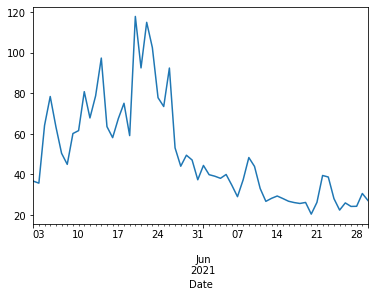

In [64]:
df_1.plot()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

In [45]:
Ethereum meningkat transaksinya di bulan Mei 2021. Transaksi di sekitar tanggal 22/23 Mei mencapai hampir $ 120 miliar.
Kemudian di bulan Juni, volume transaksinya menurun drastis hingga mencapai hampir $ 20 miliar.
Hal ini berarti volumen transaksi Ethereum di bulan Juni menurun hingga lebih dari 80% dari puncaknya di bulan Mei. 

SyntaxError: invalid syntax (2820778580.py, line 1)


(Put your analysis and conclusion here.)

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.